---
GEOPANDAS INSTALLATION
--

In order to get geopandas installed, it is necessary to install other dependencies first, on which geopandas relies on, such as GDAL, Shapely, Fiona. Pyproj, six and rtree. 

To get this done, the most practic way is downloading the unnofficial wheels for each package (https://www.lfd.uci.edu/~gohlke/pythonlibs/) according to the python version and pc specifications. These wheels should be downloaded in the same folder. From pc prompt, the package GDAL should be installed as such ":\Users\Core i5\WheelsGEO>pip install GDAL-3.2.3-cp39-cp39-win_amd64.whl", having the propmt being executed on the wheels folder path. After this, the new GDAL path to the windows PATH environment variable.

Then, from python or VScode prompt, the packages should be installed as follows

- pip install wheel
- pip install pipwin

- pipwin install numpy
- pipwin install pandas
- pipwin install shapely
- pipwin install gdal
- pipwin install fiona
- pipwin install pyproj
- pipwin install six
- pipwin install rtree
- pipwin install geopandas

Sources
https://stackoverflow.com/questions/54734667/error-installing-geopandas-a-gdal-api-version-must-be-specified-in-anaconda
https://geoffboeing.com/2014/09/using-geopandas-windows/
https://towardsdatascience.com/geopandas-installation-the-easy-way-for-windows-31a666b3610f

In [6]:
!git clone --recursive https://github.com/shakasom/GDS.git

fatal: destination path 'GDS' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import plotly_express as px
from adjustText import adjust_text


In [8]:
import zipfile  as zf

In [9]:
print(zf.ZipFile)

<class 'zipfile.ZipFile'>


In [10]:
print(zip)

<class 'zip'>


In [11]:
with zf.ZipFile(r'D:\Cindy\Ingeniería\Programming\RemoteSensing & GIS\Practice\Geopandas\GDS\dataset\1-introData.zip', 'r') as file:
    file.extractall()


----
Data reading and visualization

In [12]:
#Read countries files
countries_file = '1-introData/countries.gpkg'
countries = gpd.read_file(countries_file)


In [13]:
#Show countries dataframe
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [14]:
#Show countries dataframe number of columns and rows
countries.shape

(253, 11)

In [15]:
#Describe the main statistic information
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


In [16]:
#Read cities file

cities_file = '1-introData/cities.geojson'
cities = gpd.read_file(cities_file)

In [17]:
cities.head()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000 -34.48000)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90100 -33.54400)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.30400 -33.13900)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400 -34.53800)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21500 -34.09900)


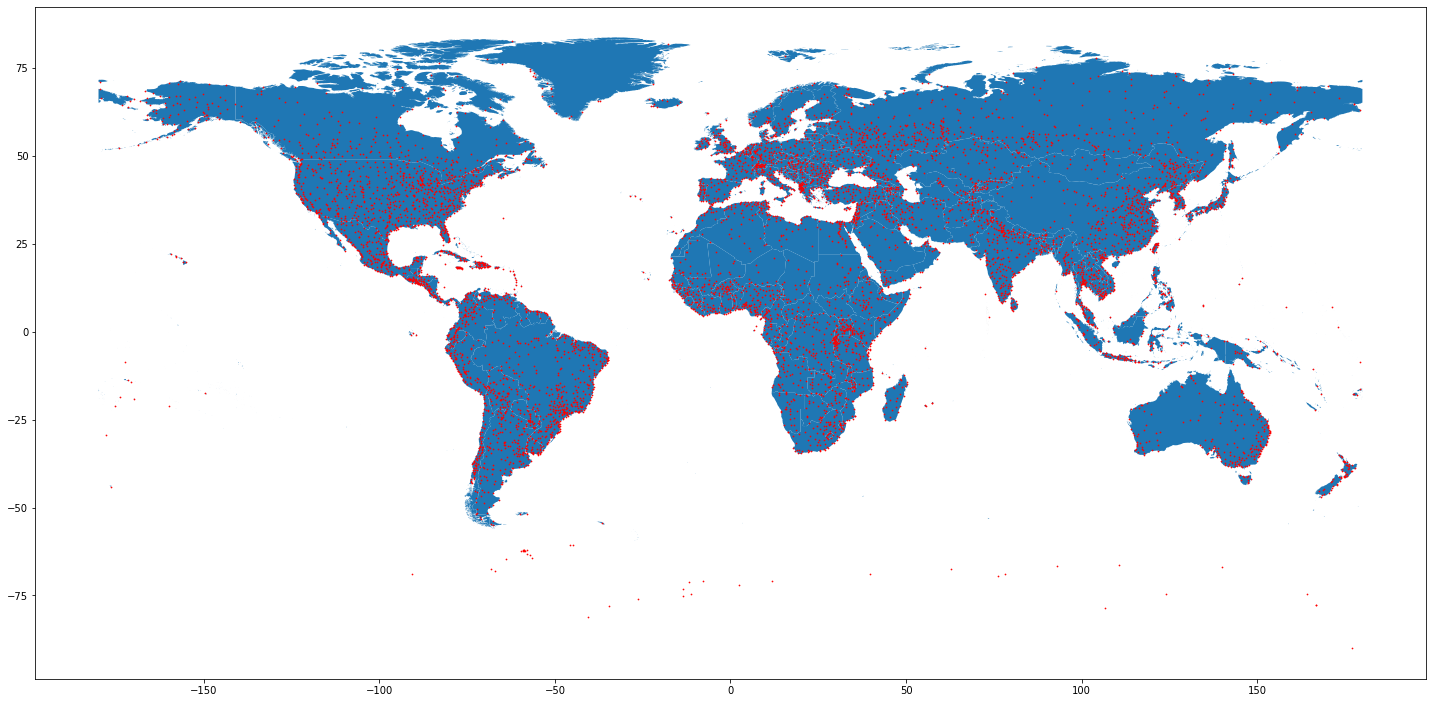

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
countries.plot(ax=ax)
cities.plot(markersize=0.5, color='red', ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')

In [19]:
#Exercise 1: Read the rivers data

rivers_file = '1-introData/rivers.gpkg'
rivers = gpd.read_file(rivers_file)

In [20]:
#Exercise 2: Read the first 5 rows of the rivers dataset
rivers.head(5)

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."


<AxesSubplot:>

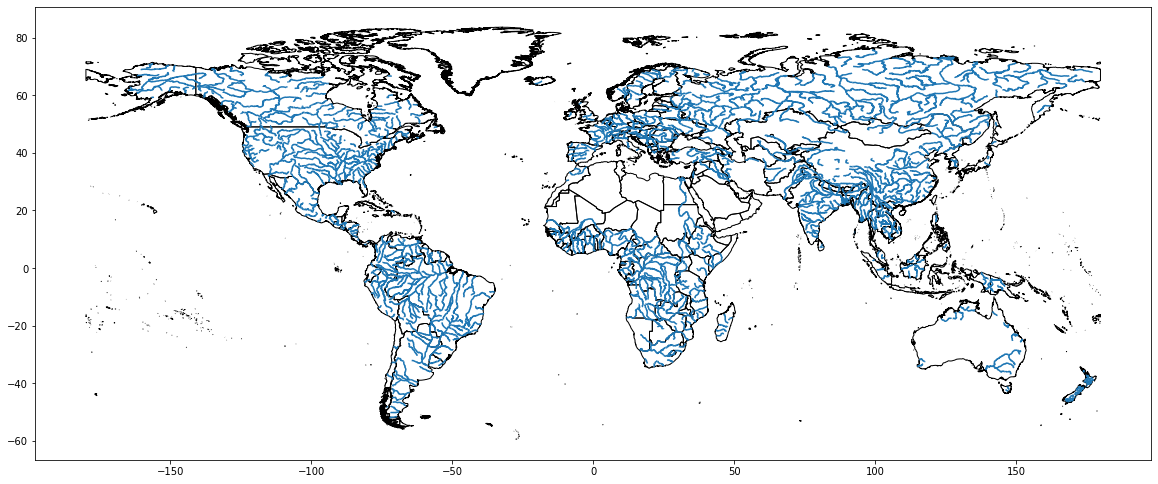

In [21]:
#Exercise 3: Visualize rivers dataset
fig, ax = plt.subplots(figsize=(20, 10))
countries.plot(facecolor='none', ax=ax)
rivers.plot(ax=ax)

-----
Coordinate systems and projections

In [22]:
#Check data CRS
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
countries.crs == cities.crs

True

In [24]:
#Check the coordinates from geometry column in countries dataframe
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [25]:
#Project data into Mercator projection epsg=3395
countries_projected = countries.to_crs({'init': 'epsg:3395'})

countries_projected['geometry'][:5]

C:\Users\cindy\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

<AxesSubplot:>

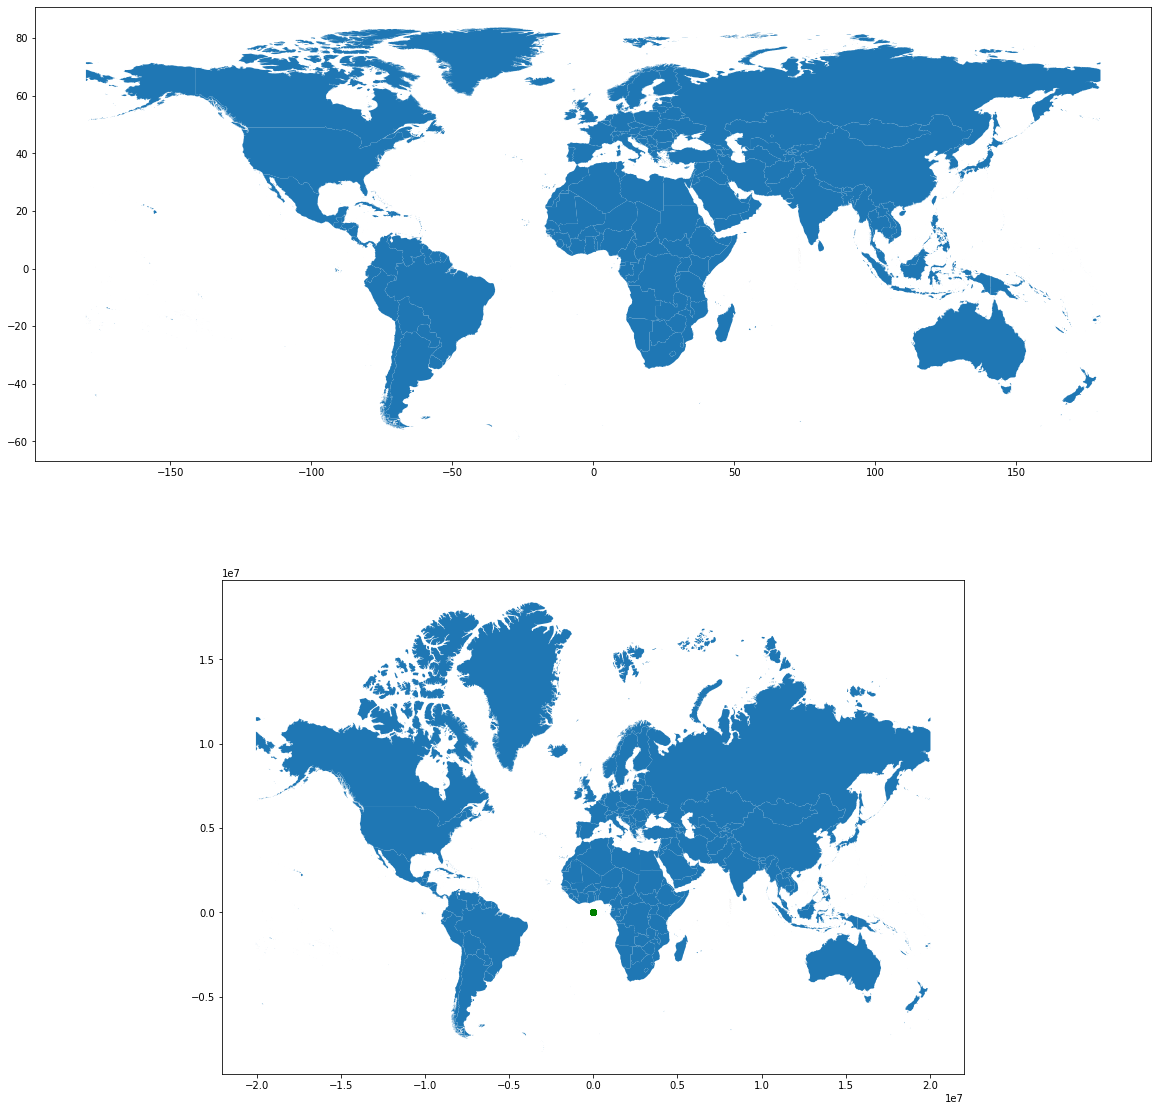

In [26]:
#Plot projected and unporjected countries

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,20))
countries.plot(ax=ax1)
countries_projected.plot(ax=ax2)
cities.plot(color='green', ax=ax2)

In [27]:
#Exercise 2.1 -- Convert cities data into EPSG:3395 and plot cities on top of countries_projected

cities_projected= cities.to_crs({'init':'epsg:3395'})


C:\Users\cindy\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


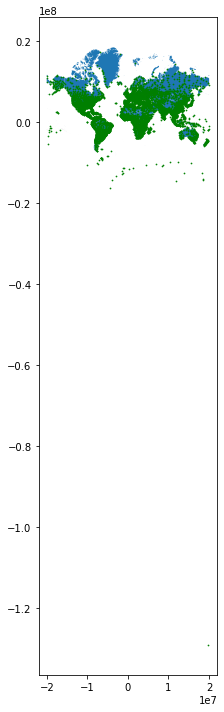

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
countries_projected.plot(ax=ax)
cities_projected.plot(color='green', markersize=0.5, ax=ax)
plt.tight_layout()

-----
Write Geograhic data

In [29]:
#Save projected files

#Countries as shapefile
countries_shape = '1-introData/countries_epsg3395.shp'
countries_projected.to_file(countries_shape)

C:\Users\cindy\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [30]:
#Cities as shapefile
cities_shape = '1-introData/cities_epsg3395.shp'
cities_projected.to_file(cities_shape)

C:\Users\cindy\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


----
GeoDataFrame and GeoSeries
----

C:\Users\cindy\AppData\Local\Temp\ipykernel_16356\2860368872.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.centroid.plot(markersize=0.8)


<AxesSubplot:>

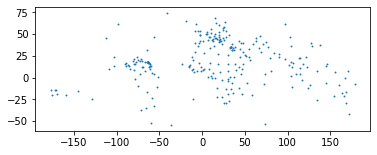

In [31]:
##Apliying centroid method (spatial method) to a GeoDataFrame
#This applies the method to the geometry column (geoseries)
countries.centroid.plot(markersize=0.8)

In [32]:
##Apliying area method (spatial method) to a GeoSeries

countries['geometry'].area[:5]

C:\Users\cindy\AppData\Local\Temp\ipykernel_16356\2157322215.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['geometry'].area[:5]


0    153.078608
1     26.703172
2     76.761813
3     92.203587
4    106.417089
dtype: float64

----
Table join and spatial join

In [33]:
#Separate data into two tables

country_shapes = countries[['geometry', 'NAME']]  ##GeoDataFrame
country_names = countries[['NAME', 'POP_EST']]    ##DataFrame

In [34]:
country_names.head(3)

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267


In [35]:
country_shapes.head(3)

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile


In [36]:
##Merge tables
country_merged = country_shapes.merge(country_names, on='NAME')
country_merged.head(3)

,geometry,NAME,POP_EST
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,260580739
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,31381992
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,17789267


In [37]:
##Spatial join
country_names = country_shapes

cities_names = cities[['name', 'geometry']]


In [38]:
##Spatial join: join two tables based on their locations
##Which cities are within wich country
cities_country = gpd.sjoin(cities_names, country_names, how='inner', predicate='within')
cities_country.sample(5)

,name,geometry,index_right,NAME
4698,Gunnedah,POINT (150.26229 -30.98701),172,Australia
1107,Put Lenina,POINT (107.79997 68.51663),48,Russia
2989,Volsk,POINT (47.37431 52.03472),48,Russia
6240,Jullundur,POINT (75.56707 31.33687),8,India
3703,Dengzhou,POINT (112.08002 32.68037),9,China


In [39]:
##Spatial join: join two tables based on their locations
##Which country contains wich city

countries_city = gpd.sjoin(country_names, cities_names, how='inner', predicate='contains')
countries_city.sample(5)

,geometry,NAME,index_right,name
48,"MULTIPOLYGON (((87.81632 49.16584, 87.71638 49...",Russia,1103,Partizansk
48,"MULTIPOLYGON (((87.81632 49.16584, 87.71638 49...",Russia,6416,Vorkuta
155,"MULTIPOLYGON (((-97.13927 25.96581, -97.16747 ...",Mexico,6466,San Luis Potosí
154,"MULTIPOLYGON (((-99.79271 67.80492, -99.79528 ...",Canada,6723,Igloolik
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,3964,Lota


-----
Buffer analysis

Get a distance around a point.

-You have to know which CRS/projection the place of interest is using to correct output

In [40]:
##To perform a buffer analysis of a city in Sweden, we have to know that the 
##CRS in meters in Sweden is EPSG:3006

stockholm = cities[cities.name == 'Stockholm']
stockholm = stockholm.to_crs('epsg:3006')
stockholm

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
7287,Stockholm,1.0,1,59.35076,18.097335,1264000,1253309,0,POINT (675974.010 6583418.116)


<AxesSubplot:>

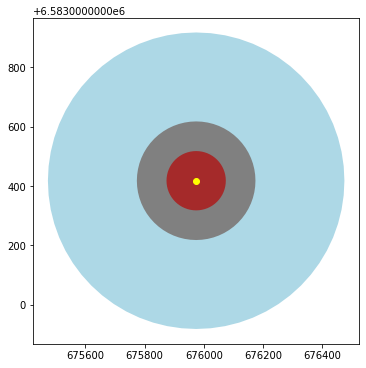

In [41]:
##Creating buffer of 500, 200 and 100 meters around the city and plot them
##The points have to be plotted from outside to inside
stockholm_100 = stockholm.buffer(100)
stockholm_200 = stockholm.buffer(200)
stockholm_500 = stockholm.buffer(500)

fig, ax = plt.subplots(figsize=(10,6))
stockholm_500.plot(ax=ax, color='lightblue')
stockholm_200.plot(ax=ax, color='gray')
stockholm_100.plot(ax=ax, color='brown')
stockholm.plot(ax=ax, color='Yellow')


----
Overlay

Perform spatial overlay operations between two geodataframes. 
(Use external datasets to compliment data to create new features.)

In [42]:
#Available datasets in Geopandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [43]:
#Read from geopandas dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [44]:
world.sample(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
77,6229794,Asia,Lebanon,LBN,85160.0,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
132,48958159,Europe,Spain,ESP,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890..."


In [45]:
capitals.head(2)

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)


In [46]:
#Select Africa
africa = world[world['continent'] == 'Africa']
africa = africa[['geometry', 'name']]
africa.head(2)

,geometry,name
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara


<AxesSubplot:>

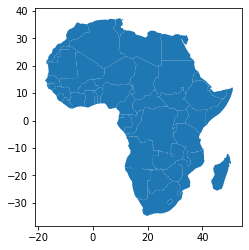

In [47]:
#Plotting Africa
africa.plot()

In [48]:
world[world['continent'] == 'South America'].head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."


In [49]:
#Select America
america = world[(world['continent'] == 'North America') | (world['continent'] == 'South America')]
# america = world[world['continent'].isin(['North America', 'South America'])]
america = america[['name', 'geometry']]
america.head(2)

,name,geometry
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [50]:
africa.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
africa = africa.to_crs('epsg:3395') 
capitals = capitals.to_crs('epsg:3395')
africa.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

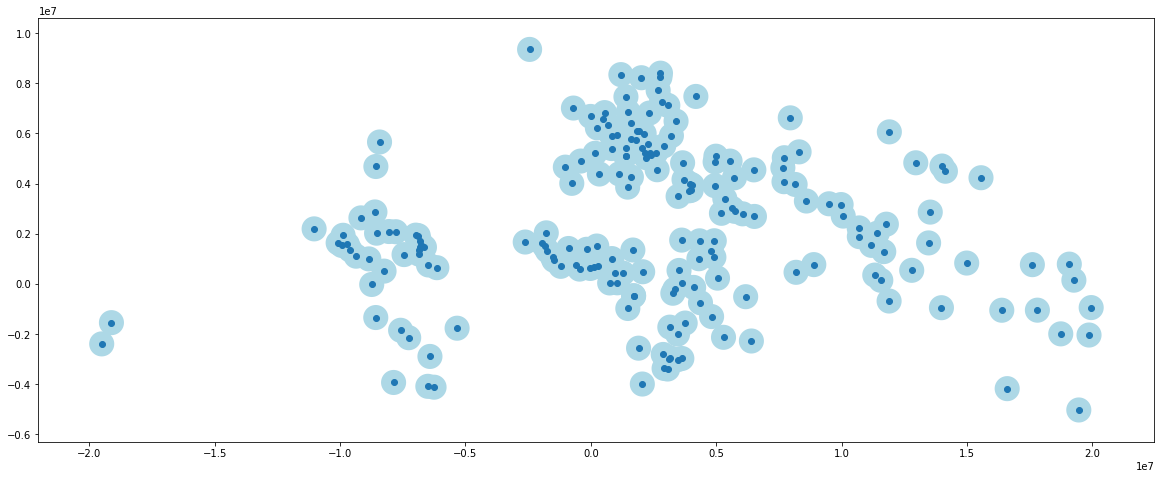

In [52]:
##Make 500 km buffer
capitals_500 = capitals.buffer(500000)

fig, ax = plt.subplots(figsize=(20,10))
capitals_500.plot(ax=ax, color='lightblue')
capitals.plot(ax=ax) ##figsize=(20,10), markersize=0.5



In [53]:
##Converting 'geometry' column of capitals into buffer
capitals['geometry'] = capitals.buffer(500000)

In [54]:
##Select the countries within 500km of a capital
##Use 'intersection' mode in overlay method
africa_cores = gpd.overlay(africa, capitals, how='intersection', keep_geom_type=False)
africa_cores.head(2)


,name_1,name_2,geometry
0,Tanzania,Moroni,"POLYGON ((4447169.129 -1122527.392, 4488021.85..."
1,Mozambique,Moroni,"POLYGON ((4399457.596 -1212342.425, 4488022.26..."


<AxesSubplot:>

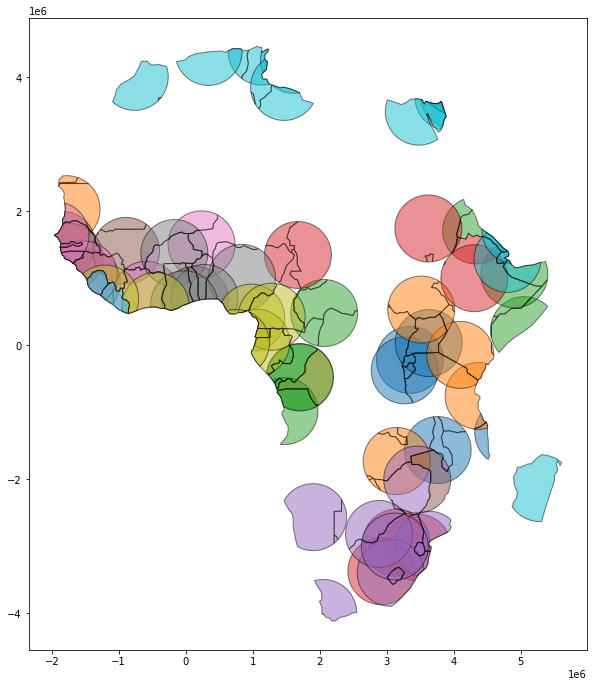

In [55]:
##Plotting overlay dataframe

africa_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10', legend=True, figsize=(10,20))

This allows us to visualize the countries (in this case) that are within the radiuos of incidence of 500km of each capital registered in Africa.

<AxesSubplot:>

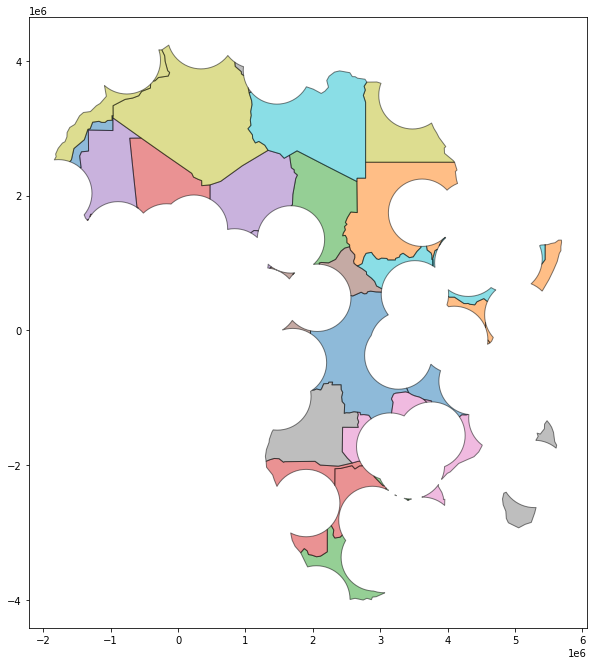

In [56]:
##To visualize the portion of the countries that are not within the radious of incidence

africa_peripheries = gpd.overlay(africa, capitals, how='difference')

africa_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10', figsize=(10,15))

This allows us to visualize the countries (in this case) that are out of the radiuos of incidence of 500km of each capital registered in Africa.

In [57]:
africa_peripheries.sample(5)

,geometry,name
23,"MULTIPOLYGON (((1055546.988 3521585.610, 10395...",Tunisia
21,"POLYGON ((2116935.121 -886208.507, 2133617.644...",Angola
16,"POLYGON ((2855395.629 582015.905, 2814022.972 ...",Central African Rep.
20,"MULTIPOLYGON (((4313481.955 -1303395.589, 4315...",Mozambique
28,"MULTIPOLYGON (((4304851.613 400113.583, 427878...",Ethiopia


------
Show countries labels in the map

In [58]:
america.head(5)

,name,geometry
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,Chile,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,Haiti,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


In [59]:
america.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
america_projected = america.to_crs('epsg:3395')
america_projected.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [99]:
##Finding the center of each country in America

america_points = america_projected.copy()
america_points['center'] = america_points['geometry'].centroid
america_points.head(5)

,name,geometry,center
3,Canada,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-10797700.204 10408580.130)
4,United States of America,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-13301024.966 6639297.292)
9,Argentina,"MULTIPOLYGON (((-7640303.070 -6882033.443, -75...",POINT (-7282544.107 -4373940.171)
10,Chile,"MULTIPOLYGON (((-7640303.070 -6882033.443, -76...",POINT (-7977888.159 -5090464.430)
16,Haiti,"POLYGON ((-7982983.556 2224827.825, -7973244.4...",POINT (-8088157.165 2129739.455)


In [100]:
##Since geodataframes can only have one geometry column, 
#'geometry' column has to be replaced

america_points = america_points.drop(columns=['geometry'])
america_points = america_points.rename(columns={'center':'geometry'})
#america_points.set_geometry('center', inplace=True)
america_points.head(2)

,name,geometry
3,Canada,POINT (-10797700.204 10408580.130)
4,United States of America,POINT (-13301024.966 6639297.292)


<AxesSubplot:>

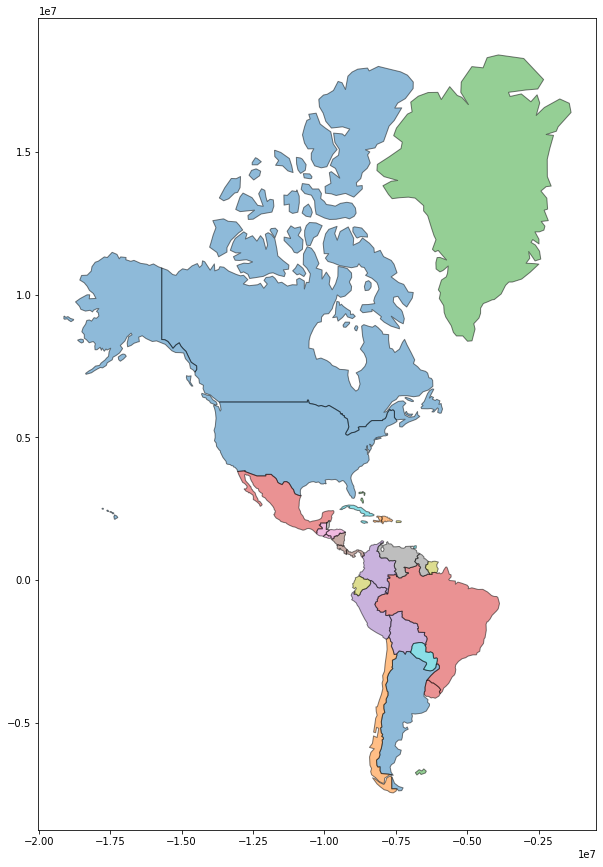

In [101]:
fig, ax = plt.subplots(figsize=(10,20))

america_projected.plot(cmap='tab10', edgecolor='k', alpha=0.5, ax=ax)

In [102]:
america_points.geometry.x

3     -1.079770e+07
4     -1.330102e+07
9     -7.282544e+06
10    -7.977888e+06
16    -8.088157e+06
17    -7.843857e+06
19    -8.675188e+06
20    -6.614876e+06
22    -4.590189e+06
27    -1.143897e+07
28    -6.233882e+06
29    -5.898884e+06
30    -7.195181e+06
31    -8.279051e+06
32    -8.135226e+06
33    -8.917731e+06
34    -9.370494e+06
35    -9.464334e+06
36    -9.639010e+06
37    -9.893325e+06
38    -1.005975e+07
39    -9.874371e+06
40    -7.365930e+06
41    -6.564767e+06
42    -6.224030e+06
44    -8.725720e+06
45    -7.400434e+06
46    -8.607713e+06
47    -8.791480e+06
156   -6.497190e+06
175   -6.827259e+06
dtype: float64

In [65]:
##This method zip allows to iterate trough several iterables at the same time, so
##loops within loops are not necessary
print(zip)

<class 'zip'>


116

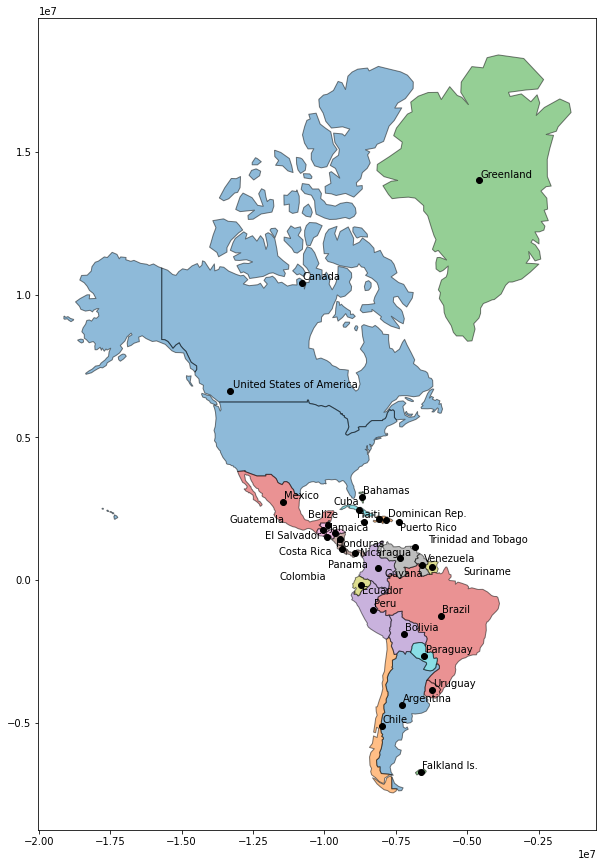

In [103]:
fig, ax = plt.subplots(figsize=(10,20))
america_projected.plot(cmap='tab10', edgecolor='k', alpha=0.5, ax=ax)
america_points.plot(color='k', ax=ax)

texts = []

for x, y, label in zip(america_points.geometry.x, america_points.geometry.y, america_points['name']):
    texts.append(plt.text(x, y, label))

adjust_text(texts, ax=ax)

# , force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(0,0), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5)
##gjcghjh